# Stock Forecasting using PyFlux

### GAS local level models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '1970-01-01' # input 
end = '2022-07-18'  # input
df = yf.download(symbol, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Date
1970-01-02    93.000000
1970-01-05    93.459999
1970-01-06    92.820000
1970-01-07    92.629997
1970-01-08    92.680000
Name: Adj Close, dtype: float64

In [4]:
df.tail()

Date
2022-07-11    3854.429932
2022-07-12    3818.800049
2022-07-13    3801.780029
2022-07-14    3790.379883
2022-07-15    3863.159912
Name: Adj Close, dtype: float64

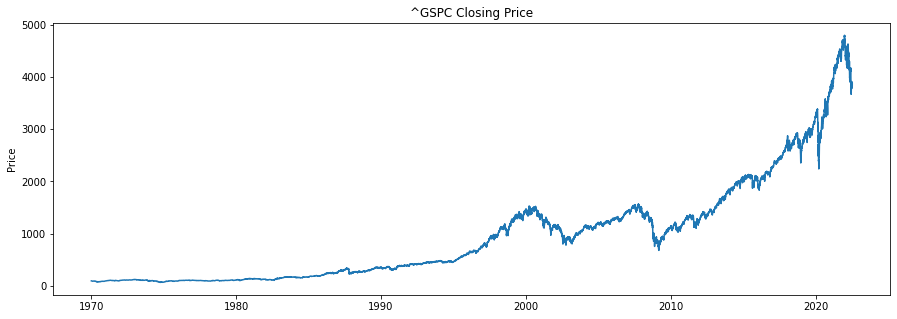

In [5]:
plt.figure(figsize=(15,5))
plt.title(symbol + " Closing Price")
plt.ylabel("Price")
plt.plot(df)

In [6]:
df.shape

(13252,)

In [7]:
df_norm = (df-df.min())/ (df.max() - df.min())

In [8]:
df_norm

Date
1970-01-02    0.006489
1970-01-05    0.006586
1970-01-06    0.006451
1970-01-07    0.006411
1970-01-08    0.006421
                ...   
2022-07-11    0.800998
2022-07-12    0.793472
2022-07-13    0.789877
2022-07-14    0.787469
2022-07-15    0.802842
Name: Adj Close, Length: 13252, dtype: float64

In [9]:
normalized = df_norm.resample('A').last()

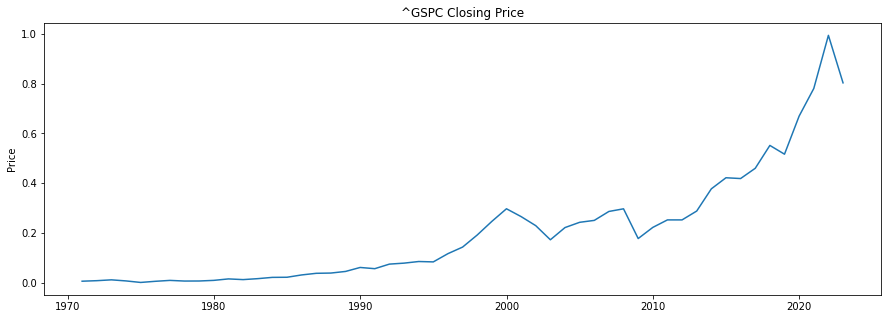

In [10]:
plt.figure(figsize=(15,5))
plt.title(symbol + " Closing Price")
plt.ylabel("Price")
plt.plot(normalized)

In [11]:
normalized.shape

(53,)

In [12]:
df = pd.DataFrame(data=normalized)
df

,Adj Close
Date,
1970-12-31,0.006309
1971-12-31,0.008409
1972-12-31,0.011780
1973-12-31,0.007450
1974-12-31,0.001326
1975-12-31,0.005895
1976-12-31,0.009543
1977-12-31,0.006932
1978-12-31,0.007146


In [13]:
model = pf.GASLLEV(data=df, family=pf.Poisson())

In [14]:
x = model.fit("MLE")
x.summary()

Poisson GAS LLM                                                                                           
======================================================= ==================================================
Dependent Variable: Adj Close                           Method: MLE                                       
Start Date: 1971-12-31 00:00:00                         Log Likelihood: -20.3967                          
End Date: 2022-12-31 00:00:00                           AIC: 42.7933                                      
Number of observations: 52                              BIC: 44.7446                                      
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
SC(1)                                    1.418      0.5851     2.4238   0.0154   (0.2713 | 2.5647)        


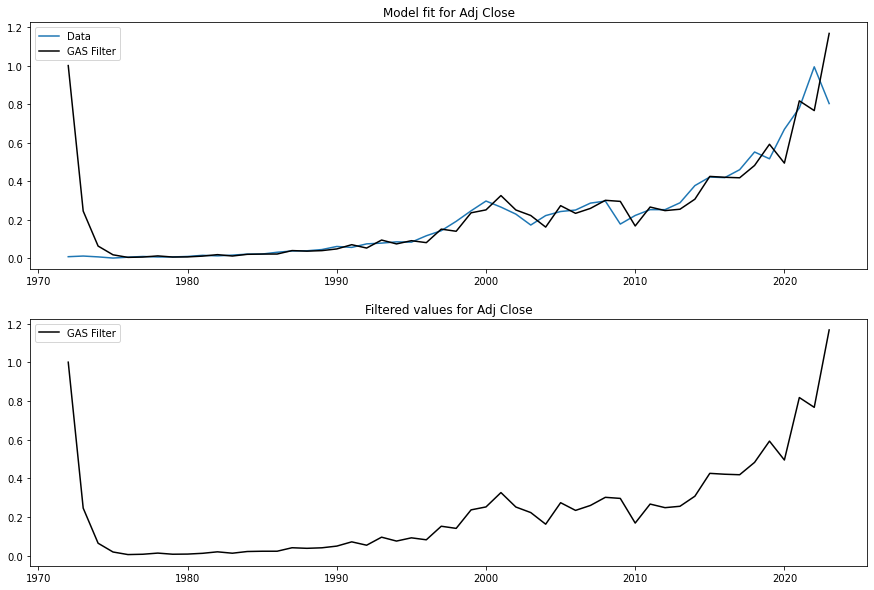

In [15]:
model.plot_fit(figsize=(15,10))

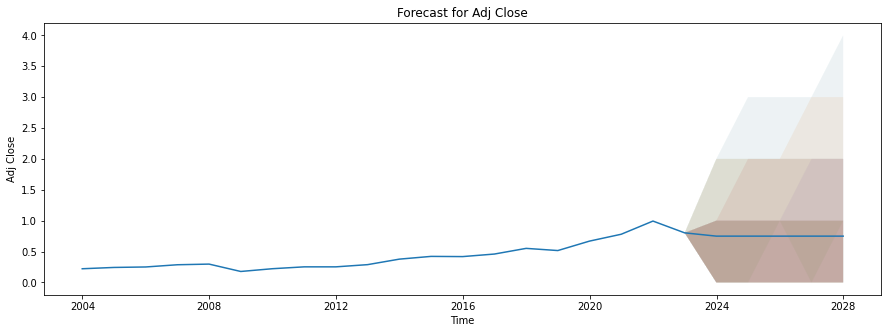

In [16]:
model.plot_predict(figsize=(15,5))

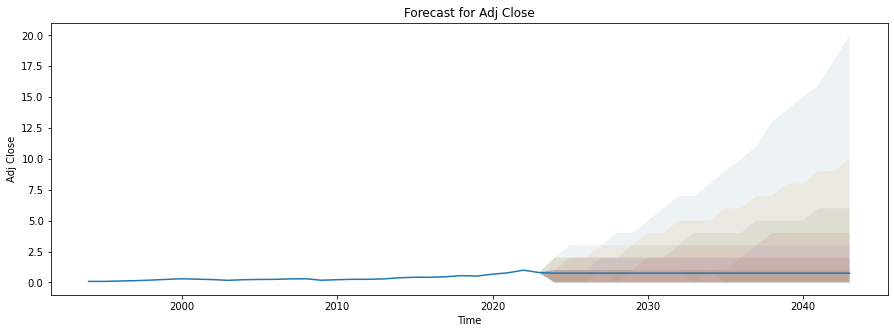

In [17]:
model.plot_predict(h=20, past_values=30, figsize=(15,5))